<a href="https://colab.research.google.com/github/alvafox/capacitaciones-2022/blob/main/Sesi%C3%B3n_3_Ejecuci%C3%B3n_presupuestaria_del_Gobierno_Central_(DICIEMBRE_2022).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sesión 3 - Ejecución presupuestaria del Gobierno Central a DICIEMBRE del 2022**

En esta sesión utilizaremos la ejecuciòn presupuestaria del gobierno central para obtener un resumen por programa en terminos de ingresos y gastos.

Recursos:


---
Archivo a descargar: https://datos.gob.cl/dataset/adbd8832-52ad-497e-bb3d-82f8d5d92f14/resource/45b17dd9-955e-4342-b711-9744295f70a4/download/ejecucion-presupuestaria_nivel-programa_a-diciembre-2022.csv

Datos GOB: https://datos.gob.cl/dataset/ejecucion-presupuestaria-a-diciembre-de-2022-del-gobierno-central-ejecucion-total

---

Ejecución por programas (DICIEMBRE): http://www.dipres.gob.cl/597/w3-multipropertyvalues-25910-34905.html#ejec_programa

ANID ejecución DICIEMBRE: http://www.dipres.gob.cl/597/articles-305564_doc_xls.xls

Decreto 854: https://www.senado.cl/senado/site/mm/20180706/asocfile/20180706110334/dto_854_02_dic_2004.pdf

---

Python-cheat-sheet: https://websitesetup.org/wp-content/uploads/2021/04/Python-cheat-sheet-April-2021.pdf

Funciones Pandas: https://pandas.pydata.org/docs/reference/frame.html

Filtrar datos en pandas: https://medium.com/towards-data-science/filtering-data-frames-in-pandas-b570b1f834b9

Gruopby: https://medium.com/towards-data-science/pandas-groupby-aggregate-transform-filter-c95ba3444bbb

Merge dataframes (como el buscarv): https://medium.com/importexcel/common-excel-task-in-python-vlookup-with-pandas-merge-c99d4e108988

Graficar después de groupby: https://medium.com/better-programming/visualize-charts-using-groupby-and-aggregate-python-functions-56454820a25c

---

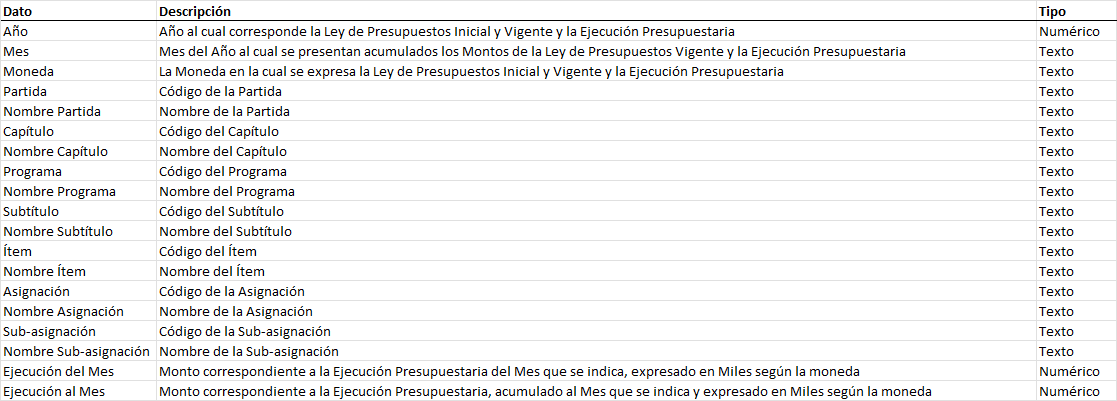

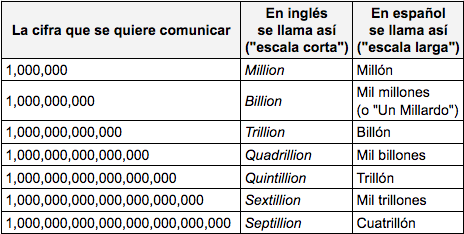

# 1 Instalar e importar librerías

In [1]:
!pip install pandas==1.2.2
!pip install sidetable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import pandas as pd
import sidetable as stb

In [2]:
pd.set_option('max_rows', 500)

# 2 Descarga y lectura de datos

Vamos a descargar los datos de la ejecución presupuestaria hasta OCTUBRE de 2022:

https://datos.gob.cl/dataset/adbd8832-52ad-497e-bb3d-82f8d5d92f14/resource/45b17dd9-955e-4342-b711-9744295f70a4/download/ejecucion-presupuestaria_nivel-programa_a-diciembre-2022.csv


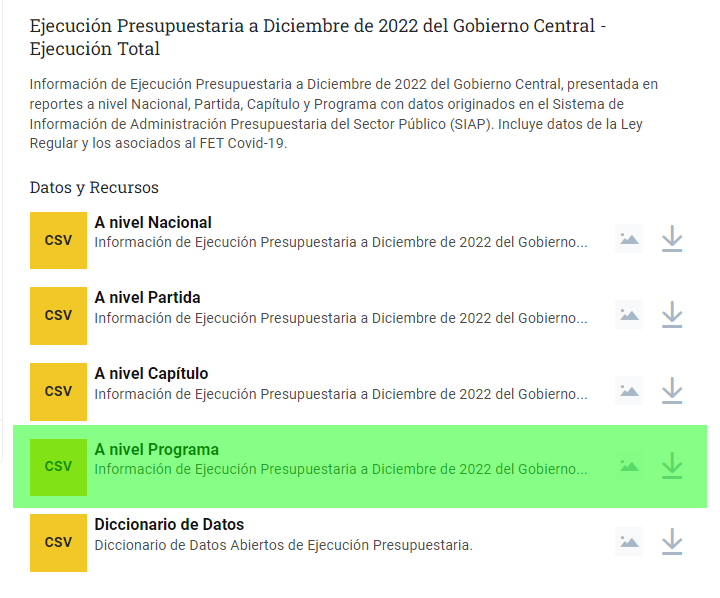

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
MES = input("Introduzca el mes a analizar en letras mayúsculas: ")
MES

Introduzca el mes a analizar en letras mayúsculas: DICIEMBRE


'DICIEMBRE'

Ahora leeremos los datos.

In [5]:
df = pd.read_csv("/content/drive/MyDrive/ejecucion-presupuestaria_nivel-programa_a-"+ MES.lower() +"-2022.csv", sep=";", encoding="UTF-8", decimal=',',thousands='.')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37977 entries, 0 to 37976
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     37977 non-null  int64  
 1   Mes                     37977 non-null  object 
 2   Moneda                  37977 non-null  object 
 3   Partida                 37977 non-null  int64  
 4   Nombre Partida          37977 non-null  object 
 5   Capítulo                37977 non-null  int64  
 6   Nombre Capítulo         37977 non-null  object 
 7   Programa                37977 non-null  int64  
 8   Nombre Programa         37977 non-null  object 
 9   Subtítulo               37977 non-null  int64  
 10  Nombre Subtítulo        37977 non-null  object 
 11  Item                    37977 non-null  int64  
 12  Nombre Item             37977 non-null  object 
 13  Asignación              37977 non-null  int64  
 14  Nombre Asignación       37971 non-null

## 2.1 Exploración de los datos

Vamos a llenar las celdas vacías (NaN)

In [6]:
df = df.fillna("Sin Información") # mediante esta función es posible llenar los NaN del dataframe con algún string o integer
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37977 entries, 0 to 37976
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Año                     37977 non-null  int64 
 1   Mes                     37977 non-null  object
 2   Moneda                  37977 non-null  object
 3   Partida                 37977 non-null  int64 
 4   Nombre Partida          37977 non-null  object
 5   Capítulo                37977 non-null  int64 
 6   Nombre Capítulo         37977 non-null  object
 7   Programa                37977 non-null  int64 
 8   Nombre Programa         37977 non-null  object
 9   Subtítulo               37977 non-null  int64 
 10  Nombre Subtítulo        37977 non-null  object
 11  Item                    37977 non-null  int64 
 12  Nombre Item             37977 non-null  object
 13  Asignación              37977 non-null  int64 
 14  Nombre Asignación       37977 non-null  object
 15  Su

In [7]:
df.shape # ejecutando el dataframe se podra ver su contenido

(37977, 19)

Mediante la siguiente función seleccionaremos los valores únicos de las partidas presupuestarias.

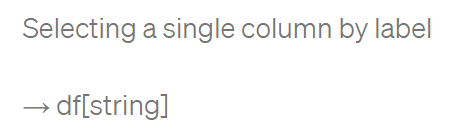

In [8]:
pd.DataFrame(df["Nombre Partida"].unique()) # son 24 ministerios, el Ministerio Público cumple otra función. = > https://www.gob.cl/instituciones/

,0
0,MINISTERIO DE RELACIONES EXTERIORES
1,MINISTERIO DE DEFENSA NACIONAL
2,TESORO PÚBLICO
3,PRESIDENCIA DE LA REPÚBLICA
4,CONGRESO NACIONAL
5,PODER JUDICIAL
6,CONTRALORÍA GENERAL DE LA REPÚBLICA
7,MINISTERIO DEL INTERIOR Y SEGURIDAD PÚBLICA
8,"MINISTERIO DE ECONOMÍA, FOMENTO Y TURISMO"
9,MINISTERIO DE HACIENDA


Ahora vamos a agrupar los datos para obtener sumas por categorías.

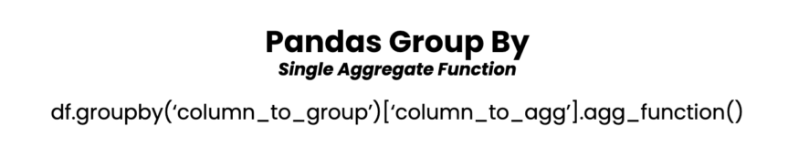

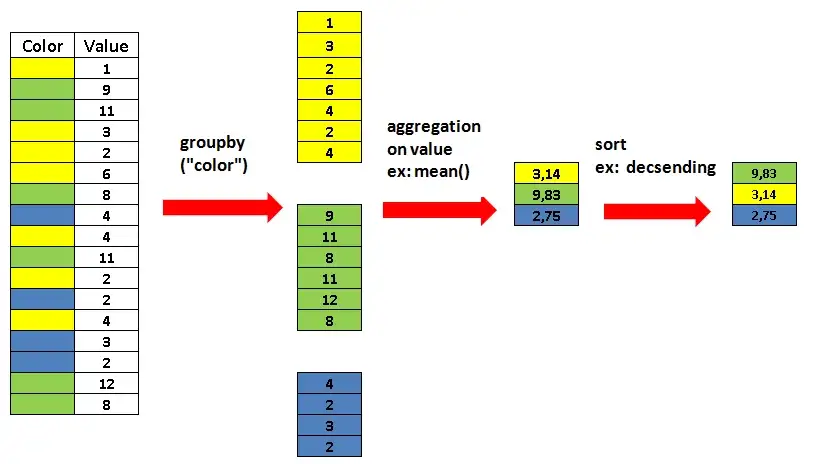

Si no especificamos las columnas con las que nos queremos quedar, entonces las calcula todas.

In [9]:
df.groupby(["Nombre Partida","Nombre Capítulo"])['Partida'].count().to_frame() 

Partida
Nombre Partida                                     Nombre Capítulo                                            
CONGRESO NACIONAL                                  BIBLIOTECA DEL CONGRESO                                 105
                                                   CONSEJO RESOLUTIVO DE ASIGNACIONES PARLAMENTARIAS        67
                                                   CÁMARA DE DIPUTADOS                                     116
                                                   SENADO                                                  122
CONTRALORÍA GENERAL DE LA REPÚBLICA                CONTRALORÍA GENERAL DE LA REPÚBLICA                     136
MINISTERIO DE AGRICULTURA                          COMISIÓN NACIONAL DE RIEGO                              109
                                                   CORPORACIÓN NACIONAL FORESTAL                           676
                                                   INSTITUTO DE DESARROLLO AGROPECUARIO                    157
                                                   OFICINA DE ESTUDIOS Y POLÍTICAS AGRARIAS                101
                                                   SERVICIO AGRÍCOLA Y GANADERO                           1024
                                                   SUBSECRETARÍA DE AGRICULTURA                            132
MINISTERIO DE BIENES NACIONALES                    SUBSECRETARÍA DE BIENES NACIONALES                      389
MINISTERIO DE CIENCIA, TECNOLOGÍA, CONOCIMIENTO... AGENCIA NACIONAL DE INVESTIGACIÓN Y DESARROLLO          225
                                                   SUBSECRETARÍA DE CIENCIA, TECNOLOGÍA, CONOCIMIE...      135
MINISTERIO DE DEFENSA NACIONAL                     ARMADA DE CHILE                                         210
                                                   DIRECCIÓN DE SANIDAD                                     82
                                                   DIRECCIÓN GENERAL DE AERONÁUTICA CIVIL                  158
                                                   DIRECCIÓN GENERAL DE MOVILIZACIÓN NACIONAL               94
                                                   DIRECCIÓN GENERAL DEL TERRITORIO MARÍTIMO               117
                                                   EJÉRCITO DE CHILE                                       209
                                                   ESTADO MAYOR CONJUNTO                                    85
                                                   FUERZA AÉREA DE CHILE                                   189
                                                   INSTITUTO GEOGRÁFICO MILITAR                             79
                                                   ORGANISMOS DE INDUSTRIA MILITAR                          77
                                                   ORGANISMOS DE SALUD DE LA FACH                           67
                                                   ORGANISMOS DE SALUD DEL EJÉRCITO                         83
                                                   SERVICIO AEROFOTOGRAMÉTRICO DE LA FACH                   72
                                                   SERVICIO HIDROGRÁFICO Y OCEANOGRÁFICO DE LA ARM...       89
                                                   SUBSECRETARÍA DE DEFENSA                                138
                                                   SUBSECRETARÍA PARA LAS FUERZAS ARMADAS                  127
MINISTERIO DE DESARROLLO SOCIAL Y FAMILIA          CORPORACIÓN NACIONAL DE DESARROLLO INDÍGENA             143
                                                   FONDO DE SOLIDARIDAD E INVERSIÓN SOCIAL                 220
                                                   INSTITUTO NACIONAL DE LA JUVENTUD                        99
                                                   SERVICIO NACIONAL DE LA DISCAPACIDAD                     91
                                                   SERVICIO NACIONAL DE PROTECCIÓN ESPECIALIZADA A...      

Consideremos las funciones de agregación de las cuales dispone pandas:

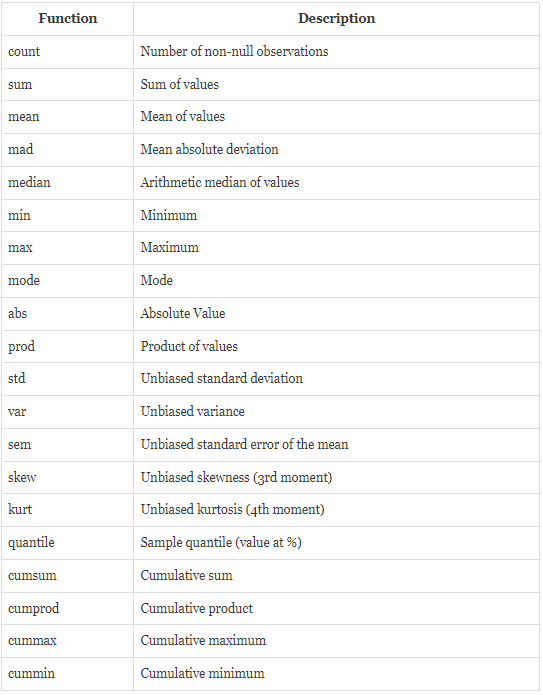

Ahora veamos cuanto gasta cada Partida

In [41]:
pd.DataFrame(df.groupby(["Nombre Partida","Moneda","Nombre Capítulo"])["Ejecución a "+ MES].sum()).style.background_gradient(cmap= 'YlOrRd', subset= ['Ejecución a '+ MES]).format('${:,.0f}') # aqui dejamos la columna de la Ejecución a OCTUBRE.

Ahora ordenemos para ver cuál es la partida con más gasto, para ello usaremos la siguiente funcion.

In [11]:
help(pd.DataFrame.sort_values)

Help on function sort_values in module pandas.core.frame:

sort_values(self, by, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key: 'ValueKeyFunc' = None)
    Sort by the values along either axis.
    
    Parameters
    ----------
            by : str or list of str
                Name or list of names to sort by.
    
                - if `axis` is 0 or `'index'` then `by` may contain index
                  levels and/or column labels.
                - if `axis` is 1 or `'columns'` then `by` may contain column
                  levels and/or index labels.
    axis : {0 or 'index', 1 or 'columns'}, default 0
         Axis to be sorted.
    ascending : bool or list of bool, default True
         Sort ascending vs. descending. Specify list for multiple sort
         orders.  If this is a list of bools, must match the length of
         the by.
    inplace : bool, default False
         If True, perform operation in-place.
    kind : 

Acontinuación, sumaremos todas las partidas, solo que hay un problema: estamos sumando los ingresos y los gastos, por lo que tenemos que separarlos.

In [12]:
pd.DataFrame(df.groupby(["Nombre Partida","Moneda"])["Ejecución a "+ MES].sum().sort_values(ascending=False).map('${:,.0f}'.format))

,,Ejecución a DICIEMBRE
Nombre Partida,Moneda,
TESORO PÚBLICO,PESOS,"$133,654,911,681"
MINISTERIO DE SALUD,PESOS,"$69,661,528,525"
MINISTERIO DEL TRABAJO Y PREVISIÓN SOCIAL,PESOS,"$27,733,214,429"
MINISTERIO DE EDUCACIÓN,PESOS,"$26,902,971,671"
MINISTERIO DEL INTERIOR Y SEGURIDAD PÚBLICA,PESOS,"$7,755,143,427"
MINISTERIO DE VIVIENDA Y URBANISMO,PESOS,"$7,216,688,212"
MINISTERIO DE OBRAS PÚBLICAS,PESOS,"$7,167,655,893"
"MINISTERIO DE ECONOMÍA, FOMENTO Y TURISMO",PESOS,"$7,160,268,989"
MINISTERIO DE DEFENSA NACIONAL,PESOS,"$3,814,457,570"


## 2.2 Ejecución presupuestaria del gobierno central

### 2.2.1 Agrupación de partidas (ingresos)

In [45]:
# Primero debemos identificar los subtitulos que cuantifican los ingresos de cada programa.
grouped = df.groupby(["Moneda","Nombre Partida","Nombre Capítulo","Nombre Programa","Subtítulo","Nombre Subtítulo", "Nombre Asignación","Nombre Sub-Asignación"], as_index = False)["Ejecución a "+ MES].sum()

#Quedarse solo con los subtitulos de ingresos.
ingresos = grouped[grouped["Subtítulo"] <= 15] # https://www.senado.cl/senado/site/mm/20180706/asocfile/20180706110334/dto_854_02_dic_2004.pdf
ingresos = ingresos.groupby(["Moneda","Nombre Partida","Nombre Capítulo", "Nombre Programa"], as_index = False)["Ejecución a "+ MES].sum()

#Renombrar columna.
ingresos = ingresos.rename(columns={"Ejecución a "+ MES:"Ingresos (Ejecución a "+ MES +")"})
ingresos.style.background_gradient(cmap= 'YlOrRd', subset= ["Ingresos (Ejecución a "+ MES +")"])

,Moneda,Nombre Partida,Nombre Capítulo,Nombre Programa,Ingresos (Ejecución a DICIEMBRE)
0,DOLARES,MINISTERIO DE DEFENSA NACIONAL,ARMADA DE CHILE,ARMADA DE CHILE,80539
1,DOLARES,MINISTERIO DE DEFENSA NACIONAL,EJÉRCITO DE CHILE,EJÉRCITO DE CHILE,18857
2,DOLARES,MINISTERIO DE DEFENSA NACIONAL,ESTADO MAYOR CONJUNTO,ESTADO MAYOR CONJUNTO,5217
3,DOLARES,MINISTERIO DE DEFENSA NACIONAL,FUERZA AÉREA DE CHILE,FUERZA AÉREA DE CHILE,74408
4,DOLARES,MINISTERIO DE RELACIONES EXTERIORES,DIRECCIÓN GENERAL DE PROMOCIÓN DE EXPORTACIONES,DIRECCIÓN GENERAL DE PROMOCIÓN DE EXPORTACIONES,21600
5,DOLARES,MINISTERIO DE RELACIONES EXTERIORES,SECRETARÍA Y ADMINISTRACIÓN GENERAL Y SERVICIO EXTERIOR,SECRETARÍA Y ADMINISTRACIÓN GENERAL Y SERVICIO EXTERIOR,162673
6,DOLARES,MINISTERIO DE RELACIONES EXTERIORES,SUBSECRETARÍA DE RELACIONES ECONÓMICAS INTERNACIONALES,SUBSECRETARÍA DE RELACIONES ECONÓMICAS INTERNACIONALES,4530
7,DOLARES,TESORO PÚBLICO,FISCO,FONDO DE ESTABILIZACIÓN ECONÓMICA Y SOCIAL,6052204
8,DOLARES,TESORO PÚBLICO,FISCO,FONDO DE RESERVA DE PENSIONES,962278
9,DOLARES,TESORO PÚBLICO,FISCO,FONDO PARA LA EDUCACIÓN,4514


### 2.2.2 Agrupación de partidas (gastos)

In [46]:
#Quedarse solo son los Subtitulos de Gastos.
gastos = grouped[grouped["Subtítulo"] > 15] # https://www.senado.cl/senado/site/mm/20180706/asocfile/20180706110334/dto_854_02_dic_2004.pdf
gastos = gastos.groupby(["Moneda","Nombre Partida","Nombre Capítulo","Nombre Programa"], as_index = False)["Ejecución a "+ MES].sum()

#Renombrar columna.
gastos = gastos.rename(columns={"Ejecución a "+ MES:"Gastos (Ejecución a "+ MES +")"})
gastos.style.background_gradient(cmap= 'YlOrRd', subset= ["Gastos (Ejecución a "+ MES +")"])

,Moneda,Nombre Partida,Nombre Capítulo,Nombre Programa,Gastos (Ejecución a DICIEMBRE)
0,DOLARES,MINISTERIO DE DEFENSA NACIONAL,ARMADA DE CHILE,ARMADA DE CHILE,81035
1,DOLARES,MINISTERIO DE DEFENSA NACIONAL,EJÉRCITO DE CHILE,EJÉRCITO DE CHILE,16724
2,DOLARES,MINISTERIO DE DEFENSA NACIONAL,ESTADO MAYOR CONJUNTO,ESTADO MAYOR CONJUNTO,5314
3,DOLARES,MINISTERIO DE DEFENSA NACIONAL,FUERZA AÉREA DE CHILE,FUERZA AÉREA DE CHILE,80495
4,DOLARES,MINISTERIO DE RELACIONES EXTERIORES,DIRECCIÓN GENERAL DE PROMOCIÓN DE EXPORTACIONES,DIRECCIÓN GENERAL DE PROMOCIÓN DE EXPORTACIONES,20543
5,DOLARES,MINISTERIO DE RELACIONES EXTERIORES,SECRETARÍA Y ADMINISTRACIÓN GENERAL Y SERVICIO EXTERIOR,SECRETARÍA Y ADMINISTRACIÓN GENERAL Y SERVICIO EXTERIOR,158752
6,DOLARES,MINISTERIO DE RELACIONES EXTERIORES,SUBSECRETARÍA DE RELACIONES ECONÓMICAS INTERNACIONALES,SUBSECRETARÍA DE RELACIONES ECONÓMICAS INTERNACIONALES,4574
7,DOLARES,TESORO PÚBLICO,FISCO,APORTE FISCAL LIBRE,316793
8,DOLARES,TESORO PÚBLICO,FISCO,FONDO DE ESTABILIZACIÓN ECONÓMICA Y SOCIAL,6052204
9,DOLARES,TESORO PÚBLICO,FISCO,FONDO DE RESERVA DE PENSIONES,962278


### 2.2.3 Resultado por programas

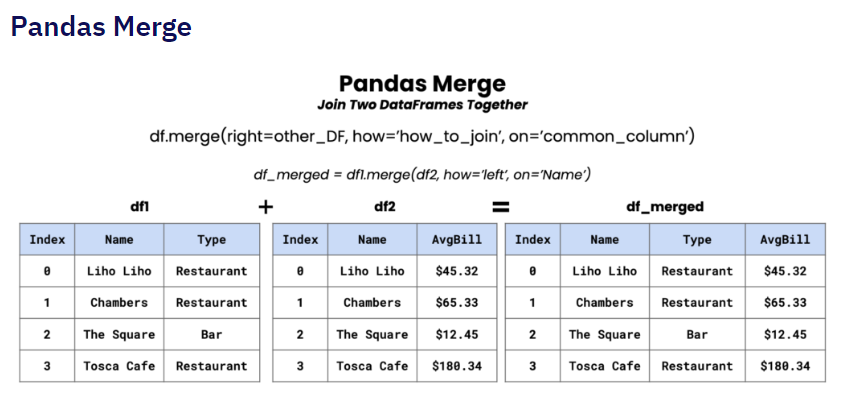

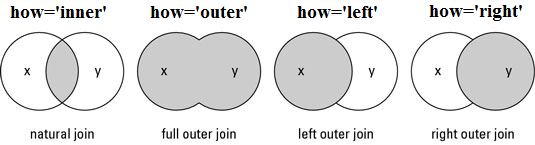

In [47]:
# https://www.datascienceexamples.com/joins-with-pandas/
# Merge DataFrames
balance = ingresos.merge(gastos, how='outer', on=["Moneda","Nombre Partida","Nombre Capítulo", 'Nombre Programa']) # analogo a un buscarv pero con cuatro valores para coincidir
balance = balance.fillna(0)
balance["Gastos (Ejecución a "+ MES +")"] = balance["Gastos (Ejecución a "+ MES +")"].astype(int)
balance["Ingresos (Ejecución a "+ MES +")"] = balance["Ingresos (Ejecución a "+ MES +")"].astype(int)
balance

,Moneda,Nombre Partida,Nombre Capítulo,Nombre Programa,Ingresos (Ejecución a DICIEMBRE),Gastos (Ejecución a DICIEMBRE)
0,DOLARES,MINISTERIO DE DEFENSA NACIONAL,ARMADA DE CHILE,ARMADA DE CHILE,80539,81035
1,DOLARES,MINISTERIO DE DEFENSA NACIONAL,EJÉRCITO DE CHILE,EJÉRCITO DE CHILE,18857,16724
2,DOLARES,MINISTERIO DE DEFENSA NACIONAL,ESTADO MAYOR CONJUNTO,ESTADO MAYOR CONJUNTO,5217,5314
3,DOLARES,MINISTERIO DE DEFENSA NACIONAL,FUERZA AÉREA DE CHILE,FUERZA AÉREA DE CHILE,74408,80495
4,DOLARES,MINISTERIO DE RELACIONES EXTERIORES,DIRECCIÓN GENERAL DE PROMOCIÓN DE EXPORTACIONES,DIRECCIÓN GENERAL DE PROMOCIÓN DE EXPORTACIONES,21600,20543
5,DOLARES,MINISTERIO DE RELACIONES EXTERIORES,SECRETARÍA Y ADMINISTRACIÓN GENERAL Y SERVICIO...,SECRETARÍA Y ADMINISTRACIÓN GENERAL Y SERVICIO...,162673,158752
6,DOLARES,MINISTERIO DE RELACIONES EXTERIORES,SUBSECRETARÍA DE RELACIONES ECONÓMICAS INTERNA...,SUBSECRETARÍA DE RELACIONES ECONÓMICAS INTERNA...,4530,4574
7,DOLARES,TESORO PÚBLICO,FISCO,FONDO DE ESTABILIZACIÓN ECONÓMICA Y SOCIAL,6052204,6052204
8,DOLARES,TESORO PÚBLICO,FISCO,FONDO DE RESERVA DE PENSIONES,962278,962278
9,DOLARES,TESORO PÚBLICO,FISCO,FONDO PARA LA EDUCACIÓN,4514,4514


In [55]:
# Restamos ingresos menos gastos para obtener el Resultado
balance["Resultado"] = balance["Ingresos (Ejecución a "+ MES +")"] - balance["Gastos (Ejecución a "+ MES +")"]
balance

,Moneda,Nombre Partida,Nombre Capítulo,Nombre Programa,Ingresos (Ejecución a DICIEMBRE),Gastos (Ejecución a DICIEMBRE),Resultado
0,DOLARES,MINISTERIO DE DEFENSA NACIONAL,ARMADA DE CHILE,ARMADA DE CHILE,80539,81035,-496
1,DOLARES,MINISTERIO DE DEFENSA NACIONAL,EJÉRCITO DE CHILE,EJÉRCITO DE CHILE,18857,16724,2133
2,DOLARES,MINISTERIO DE DEFENSA NACIONAL,ESTADO MAYOR CONJUNTO,ESTADO MAYOR CONJUNTO,5217,5314,-97
3,DOLARES,MINISTERIO DE DEFENSA NACIONAL,FUERZA AÉREA DE CHILE,FUERZA AÉREA DE CHILE,74408,80495,-6087
4,DOLARES,MINISTERIO DE RELACIONES EXTERIORES,DIRECCIÓN GENERAL DE PROMOCIÓN DE EXPORTACIONES,DIRECCIÓN GENERAL DE PROMOCIÓN DE EXPORTACIONES,21600,20543,1057
5,DOLARES,MINISTERIO DE RELACIONES EXTERIORES,SECRETARÍA Y ADMINISTRACIÓN GENERAL Y SERVICIO...,SECRETARÍA Y ADMINISTRACIÓN GENERAL Y SERVICIO...,162673,158752,3921
6,DOLARES,MINISTERIO DE RELACIONES EXTERIORES,SUBSECRETARÍA DE RELACIONES ECONÓMICAS INTERNA...,SUBSECRETARÍA DE RELACIONES ECONÓMICAS INTERNA...,4530,4574,-44
7,DOLARES,TESORO PÚBLICO,FISCO,FONDO DE ESTABILIZACIÓN ECONÓMICA Y SOCIAL,6052204,6052204,0
8,DOLARES,TESORO PÚBLICO,FISCO,FONDO DE RESERVA DE PENSIONES,962278,962278,0
9,DOLARES,TESORO PÚBLICO,FISCO,FONDO PARA LA EDUCACIÓN,4514,4514,0


In [17]:
balance["Ingresos (Ejecución a " + MES + ")"].max() # vamos a obtener la recaudación a DICIEMBRE.

64649303825

In [50]:
print("Ingresos =>", balance["Ingresos (Ejecución a " + MES + ")"].sum() - balance["Ingresos (Ejecución a " + MES + ")"].max())
print("Gastos =>", balance["Gastos (Ejecución a " + MES + ")"].sum())
print("Resultado =>", balance["Ingresos (Ejecución a " + MES + ")"].sum() -balance["Ingresos (Ejecución a " + MES + ")"].max() - balance["Gastos (Ejecución a " + MES + ")"].sum())

Ingresos => 88851838679
Gastos => 154091676462
Resultado => -65239837783


In [19]:
from google.colab import files

In [20]:
balance.to_csv("Ejecución Presupuestaria GOB (PROGRAMAS).csv", sep=";", encoding="latin1")
files.download("Ejecución Presupuestaria GOB (PROGRAMAS).csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 2.3 Ejecución presupuestaria de la ANID

Ahora utilizaremos el nombre del capítulo para seleccionar solo los datos de la ANID y observar la ejecución presupuestaria.

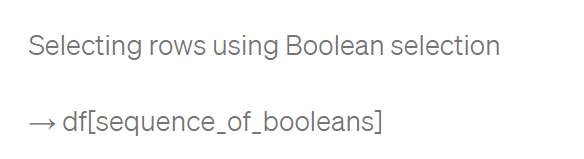

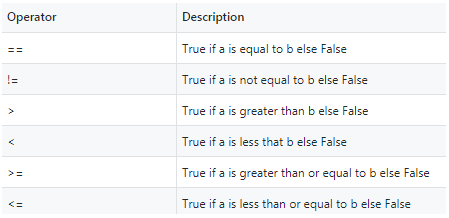

In [21]:
df_anid = df[(df["Nombre Capítulo"] == "AGENCIA NACIONAL DE INVESTIGACIÓN Y DESARROLLO")] # primero veremos el capitulo de la ANID
df_anid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225 entries, 36783 to 37007
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Año                     225 non-null    int64 
 1   Mes                     225 non-null    object
 2   Moneda                  225 non-null    object
 3   Partida                 225 non-null    int64 
 4   Nombre Partida          225 non-null    object
 5   Capítulo                225 non-null    int64 
 6   Nombre Capítulo         225 non-null    object
 7   Programa                225 non-null    int64 
 8   Nombre Programa         225 non-null    object
 9   Subtítulo               225 non-null    int64 
 10  Nombre Subtítulo        225 non-null    object
 11  Item                    225 non-null    int64 
 12  Nombre Item             225 non-null    object
 13  Asignación              225 non-null    int64 
 14  Nombre Asignación       225 non-null    object
 15  

In [22]:
df_anid.shape # Dejamos solo a la ANID para evitar revisar los datos de la Subsecretaría de Ciencia

(225, 19)

In [23]:
df_anid.groupby(["Nombre Programa", "Nombre Subtítulo"])["Ejecución a "+ MES].sum().map('${:,.0f}'.format).to_frame()

Ejecución a DICIEMBRE
Nombre Programa                                Nombre Subtítulo                                           
AGENCIA NACIONAL DE INVESTIGACIÓN Y DESARROLLO ADQUISICIÓN DE ACTIVOS NO FINANCIEROS              $637,974
                                               APORTE FISCAL                                  $281,921,274
                                               BIENES Y SERVICIOS DE CONSUMO                    $1,773,249
                                               GASTOS EN PERSONAL                              $11,465,060
                                               INTEGROS AL FISCO                                $6,999,987
                                               OTROS GASTOS CORRIENTES                            $390,606
                                               OTROS INGRESOS CORRIENTES                       $11,932,762
                                               PRESTACIONES DE SEGURIDAD SOCIAL                    $63,473
                                               SERVICIO DE LA DEUDA                            $12,341,073
                                               TRANSFERENCIAS CORRIENTES                      $395,707,942
                                               TRANSFERENCIAS DE CAPITAL                       $12,522,604
CAPACIDADES TECNOLÓGICAS                       APORTE FISCAL                                    $1,205,227
                                               BIENES Y SERVICIOS DE CONSUMO                      $109,429
                                               GASTOS EN PERSONAL                                 $925,483
                                               INTEGROS AL FISCO                                   $75,692
                                               OTROS INGRESOS CORRIENTES                           $11,829
                                               PRESTACIONES DE SEGURIDAD SOCIAL                     $2,978
                                               SERVICIO DE LA DEUDA                             $6,611,185
                                               TRANSFERENCIAS CORRIENTES                       $76,247,808
                                               TRANSFERENCIAS DE CAPITAL                          $438,695
                                               TRANSFERENCIAS PARA GASTOS DE CAPITAL              $438,696
INICIATIVA CIENTÍFICA MILENIO                  APORTE FISCAL                                   $11,767,443
                                               BIENES Y SERVICIOS DE CONSUMO                      $128,353
                                               GASTOS EN PERSONAL                                 $419,967
                                               INTEGROS AL FISCO                                  $100,921
                                               OTROS INGRESOS CORRIENTES                            $3,790
                                               SERVICIO DE LA DEUDA                             $1,378,235
                                               TRANSFERENCIAS CORRIENTES                       $29,148,468

In [24]:
# Ahora que sabemos que el capítulo también tiene CAPACIDADES TECNOLÓGICAS y la INICIATIVA CIENTIFICA MILENO, los vamos a filtrar.
df_anid = df_anid[(df["Nombre Programa"] == "AGENCIA NACIONAL DE INVESTIGACIÓN Y DESARROLLO")] 

#con el diccionario podemos definir funciones especificas para cada columna a resumir
function_dictionary = {'Ejecución de '+ MES :'sum', 'Ejecución a '+ MES:'sum'}

#anid_resumen = df_anid.groupby(["Nombre Programa", "Subtítulo","Nombre Subtítulo","Nombre Item","Nombre Asignación","Nombre Sub-Asignación"])["Ejecución de "+ MES,"Ejecución a "+ MES].sum() # es lo mismo
anid_resumen = df_anid.groupby(["Nombre Programa", "Subtítulo","Nombre Subtítulo","Nombre Item","Nombre Asignación","Nombre Sub-Asignación"]).aggregate(function_dictionary)
anid_resumen

<ipython-input-24-430d04ee92bb>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_anid = df_anid[(df["Nombre Programa"] == "AGENCIA NACIONAL DE INVESTIGACIÓN Y DESARROLLO")]


Ejecución de DICIEMBRE  \
Nombre Programa                                Subtítulo Nombre Subtítulo                      Nombre Item                                        Nombre Asignación                                  Nombre Sub-Asignación                                                    
AGENCIA NACIONAL DE INVESTIGACIÓN Y DESARROLLO 5         TRANSFERENCIAS CORRIENTES             Del Gobierno Central                               Fondo de Innovación, Ciencia y Tecnología          Sin Información                                               28570386   
                                                                                                                                                  Recuperación de Licencias Médicas - FONASA         Sin Información                                                  79023   
                                               8         OTROS INGRESOS CORRIENTES             Otros                                              Devoluciones y Reintegros no Provenientes de Im... Otros Reintegros Por Transferencias                              99474   
                                                                                                                                                                                                     Reintegros Cooperación Internacional                             30593   
                                                                                                                                                                                                     Reintegros Explora                                                   0   
                                                                                                                                                                                                     Reintegros Fondecyt - Fondap                                    569354   
                                                                                                                                                                                                     Reintegros Fondef                                                78611   
                                                                                                                                                                                                     Reintegros PCHA                                                  36295   
                                                                                                                                                                                                     Reintegros PIA                                                   22397   
                                                                                                                                                  Otros                                              Sin Información                                                  19686   
                                                                                               Recuperaciones y Reembolsos por Licencias Médicas  Recuperaciones Art. 12 Ley N° 18.196 y Ley N° 1... Sin Información                                                  26788   
                                                                                                                                                  Reembolsos Art. 4° Ley N° 19.345 y Ley N° 19.11... Sin Información                                                      0   
                                               9         APORTE FISCAL                         Libre                                              Remuneraciones                                     Sin Información                                                1996138   
                                                                                                                                                  Resto                             

In [25]:
anid_resumen.to_csv("ANID.csv", sep=";", encoding="latin1")
files.download("ANID.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
df_anid.groupby(["Subtítulo","Nombre Subtítulo"])['Ejecución a '+ MES].sum().map('${:,.0f}'.format).to_frame()

,,Ejecución a DICIEMBRE
Subtítulo,Nombre Subtítulo,
5,TRANSFERENCIAS CORRIENTES,"$68,107,975"
8,OTROS INGRESOS CORRIENTES,"$11,932,762"
9,APORTE FISCAL,"$281,921,274"
21,GASTOS EN PERSONAL,"$11,465,060"
22,BIENES Y SERVICIOS DE CONSUMO,"$1,773,249"
23,PRESTACIONES DE SEGURIDAD SOCIAL,"$63,473"
24,TRANSFERENCIAS CORRIENTES,"$327,599,967"
25,INTEGROS AL FISCO,"$6,999,987"
26,OTROS GASTOS CORRIENTES,"$390,606"


### 2.3.1 Ingresos

In [27]:
df_anid_ingresos = df_anid[df_anid["Subtítulo"] <= 15]
df_anid_ingresos.groupby(["Subtítulo","Nombre Subtítulo"])["Ejecución a "+ MES].sum().map('${:,.0f}'.format).to_frame()

,,Ejecución a DICIEMBRE
Subtítulo,Nombre Subtítulo,
5,TRANSFERENCIAS CORRIENTES,"$68,107,975"
8,OTROS INGRESOS CORRIENTES,"$11,932,762"
9,APORTE FISCAL,"$281,921,274"


In [28]:
function_dictionary = {'Ejecución a '+ MES:'sum'}
grafico_ingresos = df_anid_ingresos.groupby(["Nombre Asignación"]).aggregate(function_dictionary).sort_values(by=['Ejecución a '+ MES], ascending=False)
grafico_ingresos

,Ejecución a DICIEMBRE
Nombre Asignación,
Resto,269654374
"Fondo de Innovación, Ciencia y Tecnología",67997378
Remuneraciones,12266900
Devoluciones y Reintegros no Provenientes de Impuestos,11669007
Recuperaciones Art. 12 Ley N° 18.196 y Ley N° 19.117 Art. Único,205296
Recuperación de Licencias Médicas - FONASA,110597
Otros,52787
Reembolsos Art. 4° Ley N° 19.345 y Ley N° 19.117 Art. Único,5672


In [29]:
grafico_ingresos = grafico_ingresos.reset_index()
grafico_ingresos["Ejecución (%)"] = grafico_ingresos["Ejecución a "+ MES]/grafico_ingresos["Ejecución a "+ MES].sum()*100
#grafico_ingresos["Ejecución a "+ MES] = grafico_ingresos["Ejecución a "+ MES]
grafico_ingresos

,Nombre Asignación,Ejecución a DICIEMBRE,Ejecución (%)
0,Resto,269654374,74.497977
1,"Fondo de Innovación, Ciencia y Tecnología",67997378,18.785777
2,Remuneraciones,12266900,3.389002
3,Devoluciones y Reintegros no Provenientes de I...,11669007,3.223821
4,Recuperaciones Art. 12 Ley N° 18.196 y Ley N° ...,205296,0.056718
5,Recuperación de Licencias Médicas - FONASA,110597,0.030555
6,Otros,52787,0.014584
7,Reembolsos Art. 4° Ley N° 19.345 y Ley N° 19.1...,5672,0.001567


<Axes: ylabel='Nombre Asignación'>

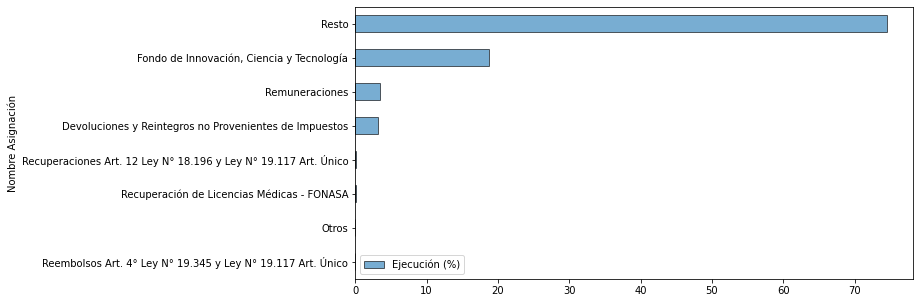

In [30]:
grafico_ingresos.sort_values(by=['Ejecución a ' + MES], ascending=True).plot.barh('Nombre Asignación',	'Ejecución (%)', figsize=(10, 5), facecolor='#1f77b4', edgecolor='k', alpha=0.6)

### 2.3.2 Gastos

In [31]:
df_anid_gastos = df_anid[df_anid["Subtítulo"] > 15]
df_anid_gastos.groupby(["Subtítulo","Nombre Subtítulo"])["Ejecución a "+ MES].sum().map('${:,.0f}'.format).to_frame()

,,Ejecución a DICIEMBRE
Subtítulo,Nombre Subtítulo,
21,GASTOS EN PERSONAL,"$11,465,060"
22,BIENES Y SERVICIOS DE CONSUMO,"$1,773,249"
23,PRESTACIONES DE SEGURIDAD SOCIAL,"$63,473"
24,TRANSFERENCIAS CORRIENTES,"$327,599,967"
25,INTEGROS AL FISCO,"$6,999,987"
26,OTROS GASTOS CORRIENTES,"$390,606"
29,ADQUISICIÓN DE ACTIVOS NO FINANCIEROS,"$637,974"
33,TRANSFERENCIAS DE CAPITAL,"$12,522,604"
34,SERVICIO DE LA DEUDA,"$12,341,073"


In [32]:
function_dictionary = {'Ejecución a ' + MES:'sum'}
grafico_gastos = df_anid_gastos.groupby(["Nombre Asignación"]).aggregate(function_dictionary).sort_values(by=['Ejecución a ' + MES], ascending=False)
grafico_gastos

,Ejecución a DICIEMBRE
Nombre Asignación,
Fondo Nacional de Desarrollo Científico y Tecnológico (FONDECYT),129818738
Becas Nacionales de Postgrado,50397958
Becas Chile,39488801
Programa de Investigación Asociativa,37378814
Fondo de Fomento Ciencia y Tecnología (FONDEF),26215267
Acceso a la Información Electrónica para Ciencia y Tecnología,13781544
Otros,12995807
Fondo de Equipamiento Científico y Tecnológico (FONDEQUIP),12522604
Fondo de Financiamiento de Centros de Investigación en Áreas Prioritarias (FONDAP),11959800


In [33]:
grafico_gastos = grafico_gastos.reset_index()
grafico_gastos["Ejecución (%)"] = grafico_gastos["Ejecución a "+ MES]/grafico_gastos["Ejecución a "+ MES].sum()*100
grafico_gastos

,Nombre Asignación,Ejecución a DICIEMBRE,Ejecución (%)
0,Fondo Nacional de Desarrollo Científico y Tecn...,129818738,34.730023
1,Becas Nacionales de Postgrado,50397958,13.482816
2,Becas Chile,39488801,10.564322
3,Programa de Investigación Asociativa,37378814,9.999843
4,Fondo de Fomento Ciencia y Tecnología (FONDEF),26215267,7.013293
5,Acceso a la Información Electrónica para Cienc...,13781544,3.686936
6,Otros,12995807,3.476730
7,Fondo de Equipamiento Científico y Tecnológico...,12522604,3.350135
8,Fondo de Financiamiento de Centros de Investig...,11959800,3.199570
9,Sueldos y Sobresueldos,8763164,2.344383


<Axes: ylabel='Nombre Asignación'>

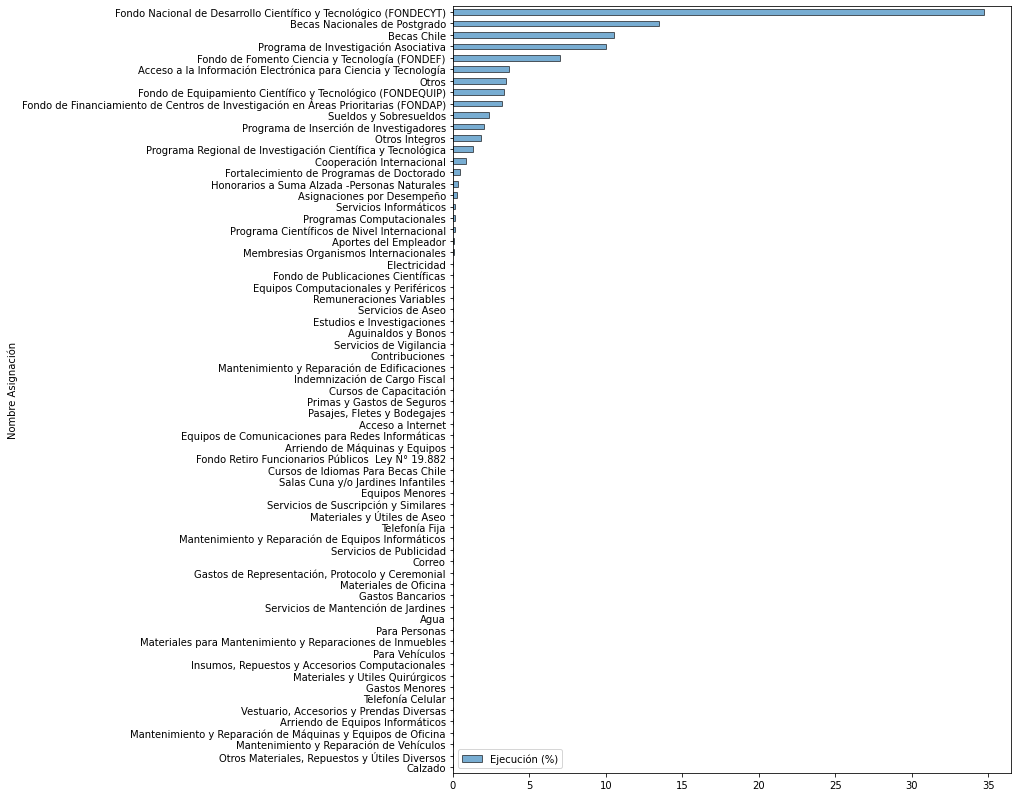

In [34]:
grafico_gastos.sort_values(by=['Ejecución a ' + MES], ascending=True).plot.barh('Nombre Asignación',	'Ejecución (%)', figsize=(10, 14.1), facecolor='#1f77b4', edgecolor='k', alpha=0.6)

### 2.3.3 Resultado

In [35]:
df_anid_ingresos["Ejecución a "+ MES].sum() - df_anid_gastos["Ejecución a "+ MES].sum()  

-11831982